##### Exercise-1: Inspecting a DataFrame
When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .describe() calculates a few summary statistics for each column.

homelessness is a DataFrame containing estimates of homelessness in each U.S. state in 2018. The individual column is the number of homeless individuals not part of a family with children. The family_members column is the number of homeless individuals part of a family with children. The state_pop column is the state's total population.

In [1]:
import pandas as pd

homelessness = pd.read_pickle('homeless_data.pkl')

In [2]:
# Print the head of the homelessness data
print(homelessness.head())

# Print information about homelessness
print(homelessness.info())

# Print the shape of homelessness
print(homelessness.shape)

# Print a description of homelessness
print(homelessness.describe())

               region       state  individuals  family_members  state_pop
0  East South Central     Alabama       2570.0           864.0    4887681
1             Pacific      Alaska       1434.0           582.0     735139
2            Mountain     Arizona       7259.0          2606.0    7158024
3  West South Central    Arkansas       2280.0           432.0    3009733
4             Pacific  California     109008.0         20964.0   39461588
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB
None
(51, 5)
         individuals  family_members     state_pop
count      51

##### Exercise-2: Parts of a DataFrame
To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

.values: A two-dimensional NumPy array of values.
.columns: An index of columns: the column names.
.index: An index for the rows: either row numbers or row names.
You can usually think of indexes as being like a list of strings or numbers, though the pandas Index data type allows for more sophisticated options. (These will be covered later in the course.)

In [3]:
# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[['East South Central' 'Alabama' 2570.0 864.0 4887681]
 ['Pacific' 'Alaska' 1434.0 582.0 735139]
 ['Mountain' 'Arizona' 7259.0 2606.0 7158024]
 ['West South Central' 'Arkansas' 2280.0 432.0 3009733]
 ['Pacific' 'California' 109008.0 20964.0 39461588]
 ['Mountain' 'Colorado' 7607.0 3250.0 5691287]
 ['New England' 'Connecticut' 2280.0 1696.0 3571520]
 ['South Atlantic' 'Delaware' 708.0 374.0 965479]
 ['South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 ['South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 ['South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 ['Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 ['Mountain' 'Idaho' 1297.0 715.0 1750536]
 ['East North Central' 'Illinois' 6752.0 3891.0 12723071]
 ['East North Central' 'Indiana' 3776.0 1482.0 6695497]
 ['West North Central' 'Iowa' 1711.0 1038.0 3148618]
 ['West North Central' 'Kansas' 1443.0 773.0 2911359]
 ['East South Central' 'Kentucky' 2735.0 953.0 4461153]
 ['West South Central' 'Louisiana' 2540.0 519.0 4659690]
 ['New 

##### Exercise-3: Sorting rows
Finding interested bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to .sort_values().

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

| Sort on ... |	Syntax |
| --- | --- |
| one column | df.sort_values("breed") |
| multiple columns | df.sort_values(\["breed", "weight_kg"\]) |

By combining .sort_values() with .head(), you can answer questions in the form, "What are the top cases where...?".

In [4]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'], ascending=[True, False])

# Print the top few rows
print(homelessness_reg_fam.head())

                region      state  individuals  family_members  state_pop
13  East North Central   Illinois       6752.0          3891.0   12723071
35  East North Central       Ohio       6929.0          3320.0   11676341
22  East North Central   Michigan       5209.0          3142.0    9984072
49  East North Central  Wisconsin       2740.0          2167.0    5807406
14  East North Central    Indiana       3776.0          1482.0    6695497


##### Exercise-4: Subsetting columns
When working with data, you may not need all of the variables in your dataset. Square-brackets ([]) can be used to select only the columns that matter to you in an order that makes sense to you. To select only "col_a" of the DataFrame df, use

<code>df["col_a"]</code>

To select "col_a" and "col_b" of df, use

<code>df[["col_a", "col_b"]]</code>

In [5]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals', 'state']]

# Print the head of the result
print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


##### Exercise-5: Subsetting rows
A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.

There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return True or False for each row, then pass that inside square brackets.

<code>dogs[dogs["height_cm"] > 60]</code>  
<code>dogs[dogs["color"] == "tan"]</code>

You can filter for multiple conditions at once by using the "logical and" operator, &.

<code>dogs[(dogs["height_cm"] > 60) & (dogs["col_b"] == "tan")]</code>

In [6]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members'] < 1000) & (homelessness['region'] == 'Pacific')]

# See the result
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


##### Exercise-6: Subsetting rows by categorical variables
Subsetting data based on a categorical variable often involves using the "or" operator (|) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the .isin() method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

```python
colors = ["brown", "black", "tan"]
condition = dogs["color"].isin(colors)
dogs[condition]
```

In [7]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

# See the result
print(mojave_homelessness)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
4    Pacific  California     109008.0         20964.0   39461588
28  Mountain      Nevada       7058.0           486.0    3027341
44  Mountain        Utah       1904.0           972.0    3153550


##### Exercise-7: Adding new columns
You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together, or by changing their units.

In [9]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of individuals
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']

# See the result
print(homelessness.head())

               region       state  individuals  family_members  state_pop  \
0  East South Central     Alabama       2570.0           864.0    4887681   
1             Pacific      Alaska       1434.0           582.0     735139   
2            Mountain     Arizona       7259.0          2606.0    7158024   
3  West South Central    Arkansas       2280.0           432.0    3009733   
4             Pacific  California     109008.0         20964.0   39461588   

      total  p_individuals  
0    3434.0       0.748398  
1    2016.0       0.711310  
2    9865.0       0.735834  
3    2712.0       0.840708  
4  129972.0       0.838704  


##### Exercise-8: Combo-attack!
You've seen the four most common types of data manipulation: sorting rows, subsetting columns, subsetting rows, and adding new columns. In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

In this exercise, you'll answer the question, "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new pandas skills to find out.

In [10]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals'] / homelessness['state_pop']

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state', 'indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


##### Exercise-9: Mean and median
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [12]:
sales = pd.read_pickle('walmart_sales.pkl')
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
3,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
4,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [13]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False       5.727778   
2      1    A           3 2010-02-05      13740.12       False       5.727778   
3      1    A           4 2010-02-05      39954.04       False       5.727778   
4      1    A           5 2010-02-05      32229.38       False       5.727778   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.679451         8.106  
2              0.679451         8.106  
3              0.679451         8.106  
4              0.679451         8.106  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 413119 entries, 0 to 413118
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   store                 413119 non-null  i

##### Exercise-10: Summarizing dates
Summary statistics can also be calculated on date columns which have values with the data type datetime64. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example minimum and maximum, which allow you to see what time range your data covers.

In [14]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

2012-10-26 00:00:00
2010-02-05 00:00:00


##### Exercise-11: Efficient summaries
While pandas and NumPy have tons of functions, sometimes you may need a different function to summarize your data.

The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super efficient.

In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.

In [15]:
# Import NumPy and create custom IQR function
import numpy as np

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr             15.30              0.211866         1.672
median          16.75              0.911922         7.852


##### Exercise-12: Cumulative statistics
Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

A DataFrame called sales_1_1 has been created for you, which contains the sales data for department 1 of store 1.

In [16]:
sales_1_1 = sales[(sales['store'] == 1) & (sales['department'] == 1)]

In [17]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

            date  weekly_sales  cum_weekly_sales  cum_max_sales
0     2010-02-05      24924.50          24924.50       24924.50
73    2010-02-12      46039.49          70963.99       46039.49
145   2010-02-19      41595.55         112559.54       46039.49
218   2010-02-26      19403.54         131963.08       46039.49
290   2010-03-05      21827.90         153790.98       46039.49
...          ...           ...               ...            ...
9883  2012-09-28      18947.81        3123160.62       57592.12
9956  2012-10-05      21904.47        3145065.09       57592.12
10028 2012-10-12      22764.01        3167829.10       57592.12
10101 2012-10-19      24185.27        3192014.37       57592.12
10172 2012-10-26      27390.81        3219405.18       57592.12

[143 rows x 4 columns]


##### Exercise-13: Dropping duplicates
Removing duplicates is an essential skill to get accurate counts, because often you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.

In [18]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store', 'type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store', 'department'])
print(store_depts.head())

# Subset the rows that are holiday weeks and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset=['date'])

# Print date col of holiday_dates
print(holiday_dates['date'])

       store type  department       date  weekly_sales  is_holiday  \
0          1    A           1 2010-02-05      24924.50       False   
10244      2    A           1 2010-02-05      35034.06       False   
20482      3    B           1 2010-02-05       6453.58       False   
29518      4    A           1 2010-02-05      38724.42       False   
39790      5    B           1 2010-02-05       9323.89       False   

       temperature_c  fuel_price_usd_per_l  unemployment  
0           5.727778              0.679451         8.106  
10244       4.550000              0.679451         8.324  
20482       7.616667              0.679451         7.368  
29518       6.533333              0.686319         8.623  
39790       4.277778              0.679451         6.566  
   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False 

##### Exercise-13: Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number.

In [22]:
stores = store_types[['store', 'type']].copy()
stores.rename(columns={'type': 'store_type'}, inplace=True)

departments = store_depts[['store', 'department']].copy()
departments.rename(columns={'department': 'department_num'}, inplace=True)

In [23]:
# Count the number of stores of each type
store_counts = stores['store_type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = stores['store_type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = departments['department_num'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = departments['department_num'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    22
B    17
C     6
Name: store_type, dtype: int64
A    0.488889
B    0.377778
C    0.133333
Name: store_type, dtype: float64
1     45
9     45
4     45
6     45
8     45
      ..
37    20
50    14
43     5
39     5
65     1
Name: department_num, Length: 81, dtype: int64
1     0.013778
9     0.013778
4     0.013778
6     0.013778
8     0.013778
        ...   
37    0.006124
50    0.004287
43    0.001531
39    0.001531
65    0.000306
Name: department_num, Length: 81, dtype: float64


##### Exercise-14: What percent of sales occurred at each store type?
While .groupby() is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters", "discount stores", and "neighborhood markets", encoded in this dataset as type "A", "B", and "C". In this exercise, you'll calculate the total sales made at each store type, without using .groupby(). You can then use these numbers to see what proportion of Walmart's total sales were made at each.

In [24]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.65137469 0.28763851 0.0609868 ]


##### Exercise-15: Calculations with .groupby()
The .groupby() method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the .groupby() method. You'll also perform calculations on data grouped by two variables to see if sales differs by store type depending on if it's a holiday week or not.

In [25]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         4.007612e+09
      True          3.234028e+08
B     False         1.765411e+09
      True          1.471081e+08
C     False         3.772478e+08
      True          2.825570e+07
Name: weekly_sales, dtype: float64


##### Exercise-16: Multiple grouped summaries
Earlier in this chapter you saw that the .agg() method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including:

- np.min()
- np.max()
- np.mean()
- np.median()

In [26]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         amin       amax          mean    median
type                                            
A    -4988.94  474330.10  20099.568043  10105.17
B    -3924.00  693099.36  12335.331875   6269.02
C     -379.00  112152.35   9519.532538   1149.67
     unemployment                          fuel_price_usd_per_l            \
             amin    amax      mean median                 amin      amax   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676  


##### Exercise-17: Pivoting on one variable
Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the .pivot_table() method is just an alternative to .groupby().

In this exercise, you'll perform calculations using .pivot_table() to replicate the calculations you performed in the last lesson using .groupby().

In [27]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table('weekly_sales', index='type', aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table('weekly_sales', index='type', columns='is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

              mean       median
      weekly_sales weekly_sales
type                           
A     20099.568043     10105.17
B     12335.331875      6269.02
C      9519.532538      1149.67
is_holiday         False         True 
type                                  
A           20008.746759  21297.517824
B           12248.741339  13478.844240
C            9518.528116   9532.963131


##### Exercise-18: Fill in missing values and sum values with pivot tables
The .pivot_table() method has several useful arguments, including fill_value and margins.

- fill_value replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.
- margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

In this exercise, you'll practice using these arguments to up your pivot table skills, which will help you crunch numbers more efficiently!

In [28]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

type                   A             B             C           All
department                                                        
1           22956.887886  17990.876158   8951.733462  19213.485088
2           51994.674873  43051.996919  14424.851713  43607.020113
3           13881.033137  12965.414311    820.276818  11793.698516
4           32973.814075  21259.895804  13669.370396  25974.630238
5           26803.448045  21184.602916    767.600774  21365.583515
...                  ...           ...           ...           ...
96          19900.943552   4752.674874  15766.025431  15217.211505
97          22093.807101   3543.243304  13419.542809  14437.120839
98          10979.816195    299.951644   5479.758054   6973.013875
99            431.443064     25.716667      8.330952    415.487065
All         20099.568043  12335.331875   9519.532538  16094.726811

[82 rows x 4 columns]


##### Exercise-19: Setting & removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In this chapter, you'll be exploring temperatures, a DataFrame of average temperatures in cities around the world.

In [164]:
temperatures = pd.read_csv('temperatures.csv', parse_dates=[1], index_col=0)
temperatures.head()

,date,city,country,avg_temp_c
0,,,,
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [165]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 0 to 16499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        16500 non-null  datetime64[ns]
 1   city        16500 non-null  object        
 2   country     16500 non-null  object        
 3   avg_temp_c  16407 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 644.5+ KB


In [166]:
# Look at temperatures
print(temperatures.head())

# Index temperatures by city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind.head())

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

        date     city        country  avg_temp_c
0                                               
0 2000-01-01  Abidjan  Côte D'Ivoire      27.293
1 2000-02-01  Abidjan  Côte D'Ivoire      27.685
2 2000-03-01  Abidjan  Côte D'Ivoire      29.061
3 2000-04-01  Abidjan  Côte D'Ivoire      28.162
4 2000-05-01  Abidjan  Côte D'Ivoire      27.547
              date        country  avg_temp_c
city                                         
Abidjan 2000-01-01  Côte D'Ivoire      27.293
Abidjan 2000-02-01  Côte D'Ivoire      27.685
Abidjan 2000-03-01  Côte D'Ivoire      29.061
Abidjan 2000-04-01  Côte D'Ivoire      28.162
Abidjan 2000-05-01  Côte D'Ivoire      27.547
          city       date        country  avg_temp_c
0      Abidjan 2000-01-01  Côte D'Ivoire      27.293
1      Abidjan 2000-02-01  Côte D'Ivoire      27.685
2      Abidjan 2000-03-01  Côte D'Ivoire      29.061
3      Abidjan 2000-04-01  Côte D'Ivoire      28.162
4      Abidjan 2000-05-01  Côte D'Ivoire      27.547
...        ...   

##### Exercise-20: Subsetting with .loc[]
The killer feature for indexes is .loc\[\]: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using .loc\[\] can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [167]:
# Make a list of cities to subset on
cities = ['Cali', 'Kano']

# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

           date  city   country  avg_temp_c
0                                          
2640 2000-01-01  Cali  Colombia      21.605
2641 2000-02-01  Cali  Colombia      21.824
2642 2000-03-01  Cali  Colombia      22.084
2643 2000-04-01  Cali  Colombia      21.951
2644 2000-05-01  Cali  Colombia      21.863
...         ...   ...       ...         ...
7585 2013-05-01  Kano   Nigeria      31.254
7586 2013-06-01  Kano   Nigeria      28.920
7587 2013-07-01  Kano   Nigeria      26.844
7588 2013-08-01  Kano   Nigeria      24.912
7589 2013-09-01  Kano   Nigeria         NaN

[330 rows x 4 columns]
           date   country  avg_temp_c
city                                 
Cali 2000-01-01  Colombia      21.605
Cali 2000-02-01  Colombia      21.824
Cali 2000-03-01  Colombia      22.084
Cali 2000-04-01  Colombia      21.951
Cali 2000-05-01  Colombia      21.863
...         ...       ...         ...
Kano 2013-05-01   Nigeria      31.254
Kano 2013-06-01   Nigeria      28.920
Kano 2013-07-01   Nigeri

##### Exercise-21: Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial you might have control and treatment groups. Then each test subject belongs to one or other group, and we can say that test subject is nested inside treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say city is nested inside country.

The main downside is that the code for manipulating indexes is different to the code for the manipulating columns, so you have to learn two syntaxes, and keep track of how your data is represented.

In [168]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                              date  avg_temp_c
country  city                                 
Brazil   Rio De Janeiro 2000-01-01      25.974
         Rio De Janeiro 2000-02-01      26.699
         Rio De Janeiro 2000-03-01      26.270
         Rio De Janeiro 2000-04-01      25.750
         Rio De Janeiro 2000-05-01      24.356
...                            ...         ...
Pakistan Lahore         2013-05-01      33.457
         Lahore         2013-06-01      34.456
         Lahore         2013-07-01      33.279
         Lahore         2013-08-01      31.511
         Lahore         2013-09-01         NaN

[330 rows x 2 columns]


##### Exercise-22: Sorting by index values
Previously, you changed the order of the rows in a DataFrame by calling .sort_values(). It's also useful to be able to sort by elements in the index. For this, you need to use .sort_index().

In [169]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level='city'))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=['country', 'city'], ascending=[True, False]))

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]
                            date  avg_temp_c
country       city                          
Côte D'Ivoire Abidjan 2000-01-01      27.293
              Abidjan 2000-02-01      27.685
              Abidjan 2000-03-01      29.061
              Abidjan 2000-04-01      28.162
              Abidjan 2000-05-01      27.547
...                          ...         ...
China         Xian    2013-05-01      18.979
              Xian    2

##### Exercise-23: Slicing index values
Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values, or by row/column number; we'll start with the first case. This involves slicing inside the .loc[] method.

Compared to slicing lists, there are a few things to remember.

- You can only slice an index if the index is sorted (using .sort_index()).
- To slice at the outer level, first and last can be strings.
- To slice at inner levels, first and last should be tuples.
- If you pass a single slice to .loc\[\], it will slice the rows.

In [170]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc['Lahore':'Moscow'])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[('Pakistan','Lahore'):('Russia','Moscow')])

                                date  avg_temp_c
country  city                                   
Pakistan Faisalabad       2000-01-01      12.792
         Faisalabad       2000-02-01      14.339
         Faisalabad       2000-03-01      20.309
         Faisalabad       2000-04-01      29.072
         Faisalabad       2000-05-01      34.845
...                              ...         ...
Russia   Saint Petersburg 2013-05-01      12.355
         Saint Petersburg 2013-06-01      17.185
         Saint Petersburg 2013-07-01      17.234
         Saint Petersburg 2013-08-01      17.153
         Saint Petersburg 2013-09-01         NaN

[1155 rows x 2 columns]
                         date  avg_temp_c
country city                             
Mexico  Mexico     2000-01-01      12.694
        Mexico     2000-02-01      14.677
        Mexico     2000-03-01      17.376
        Mexico     2000-04-01      18.294
        Mexico     2000-05-01      18.562
...                       ...         ...
Mo

##### Exercise-24: Slicing in both directions
You've seen slicing DataFrames by rows and by columns, but since DataFrames are two dimensional objects it is often natural to slice both dimensions at once. That is, by passing two arguments to .loc[], you can subset by rows and columns in one go.

In [171]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,'date':'avg_temp_c'])

# Subset in both directions at once
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad'),'date':'avg_temp_c'])

                        date  avg_temp_c
country city                            
India   Hyderabad 2000-01-01      23.779
        Hyderabad 2000-02-01      25.826
        Hyderabad 2000-03-01      28.821
        Hyderabad 2000-04-01      32.698
        Hyderabad 2000-05-01      32.438
...                      ...         ...
Iraq    Baghdad   2013-05-01      28.673
        Baghdad   2013-06-01      33.803
        Baghdad   2013-07-01      36.392
        Baghdad   2013-08-01      35.463
        Baghdad   2013-09-01         NaN

[2145 rows x 2 columns]
                         date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 201

##### Exercise-25: Slicing time series
Slicing is particularly useful for time series, since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use .loc[] to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, yyyy-mm-dd.

Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators (such as &). To do so in one line of code you'll need to add parentheses () around each condition.

In [172]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
print(temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-31')])

# Set date as an index
temperatures_ind = temperatures.set_index('date')

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-8':'2011-2'])

            date     city        country  avg_temp_c
0                                                   
120   2010-01-01  Abidjan  Côte D'Ivoire      28.270
121   2010-02-01  Abidjan  Côte D'Ivoire      29.262
122   2010-03-01  Abidjan  Côte D'Ivoire      29.596
123   2010-04-01  Abidjan  Côte D'Ivoire      29.068
124   2010-05-01  Abidjan  Côte D'Ivoire      28.258
...          ...      ...            ...         ...
16474 2011-08-01     Xian          China      23.069
16475 2011-09-01     Xian          China      16.775
16476 2011-10-01     Xian          China      12.587
16477 2011-11-01     Xian          China       7.543
16478 2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]
               city        country  avg_temp_c
date                                          
2010-01-01  Abidjan  Côte D'Ivoire      28.270
2010-02-01  Abidjan  Côte D'Ivoire      29.262
2010-03-01  Abidjan  Côte D'Ivoire      29.596
2010-04-01  Abidjan  Côte D'Ivoire      29.068
2010

##### Exercise-26: Subsetting by row/column number
The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition, or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using .iloc[], and like .loc[], it can take two arguments to let you subset by rows and columns.

In [173]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[:5,2:4])

Abidjan
        date     city        country  avg_temp_c
0                                               
0 2000-01-01  Abidjan  Côte D'Ivoire      27.293
1 2000-02-01  Abidjan  Côte D'Ivoire      27.685
2 2000-03-01  Abidjan  Côte D'Ivoire      29.061
3 2000-04-01  Abidjan  Côte D'Ivoire      28.162
4 2000-05-01  Abidjan  Côte D'Ivoire      27.547
             country  avg_temp_c
0                               
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]
         country  avg_temp_c
0                           
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire    

##### Exercise-27: Pivot temperature by city and year
It's interesting to see how temperatures for each city change over time. Looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form dataframe\["column"\].dt.component. For example, the month component is dataframe\["column"\].dt.month, and the year component is dataframe\["column"\].dt.year.

Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.

In [174]:
# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table('avg_temp_c', index=['country', 'city'], columns='year')

# See the result
print(temp_by_country_city_vs_year)

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333 

##### Exercise-28: Subsetting pivot tables
A pivot table is just a DataFrame with sorted indexes, so the techniques you have learned already can be used to subset them. In particular, the .loc[] + slicing combination is often helpful.

In [175]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi')]

# Subset in both directions at once
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'),'2005':'2010']

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

##### Exercise-29: Calculating on a pivot table
Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where a highest or lowest value occurs.

Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: series\[series > value\].

In [176]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis='columns')

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

year
2013    20.312285
dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


##### Exercise-30: Which avocado size is most popular?
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

In [188]:
avocados = pd.read_pickle('avoplotto.pkl')
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


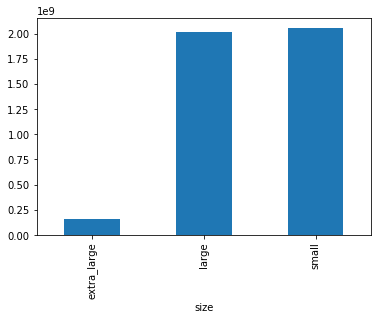

In [178]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

##### Exercise-31: Changes in sales over time
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing change in a number over time, since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

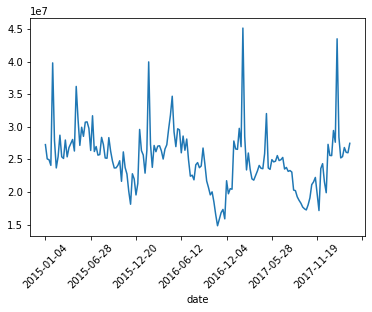

In [179]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line', rot=45)

# Show the plot
plt.show()

##### Exercise-32: Avocado supply and demand
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

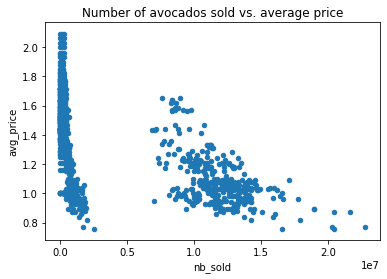

In [180]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

##### Exercise-33: Price of conventional vs. organic avocados
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

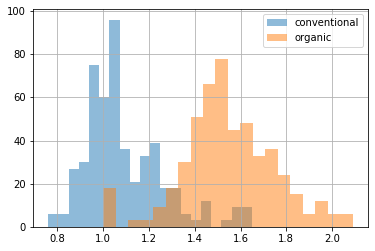

In [181]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

##### Exercise-34: Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

In [192]:
avocados_2016 = pd.read_pickle('avocados_2016.pkl')
avocados_2016.head()

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.00,30290000.0,9255000.0,10280000.0,542000.0,10210000.0,7710000.0,2417000.0,81101.22
1,2016-12-18,0.96,29580000.0,9394000.0,10340000.0,427900.0,9423000.0,6970000.0,2358000.0,94011.78
2,2016-12-11,0.98,30090000.0,9010000.0,NaN,403000.0,10710000.0,8149000.0,2490000.0,73342.82
3,2016-12-04,1.00,31620000.0,11040000.0,9909000.0,428000.0,10240000.0,7187000.0,2989000.0,65350.63
4,2016-11-27,1.21,22920000.0,7891000.0,7337000.0,NaN,7350000.0,5691000.0,1610000.0,48623.28


     date  avg_price  total_sold  small_sold  large_sold  xl_sold  \
0   False      False       False       False       False    False   
1   False      False       False       False       False    False   
2   False      False       False       False        True    False   
3   False      False       False       False       False    False   
4   False      False       False       False       False     True   
5   False      False       False        True       False    False   
6   False      False       False       False       False    False   
7   False      False       False       False        True    False   
8   False      False       False       False       False    False   
9   False      False       False       False       False    False   
10  False      False       False       False        True    False   
11  False      False       False       False       False    False   
12  False      False       False       False       False    False   
13  False      False       False  

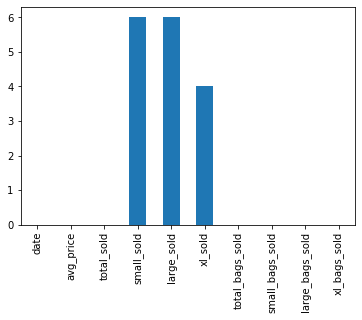

In [193]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

##### Exercise-35: Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

In [194]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


##### Exercise-37: Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0—you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

<code>dogs[["height_cm", "weight_kg"]].hist()</code>

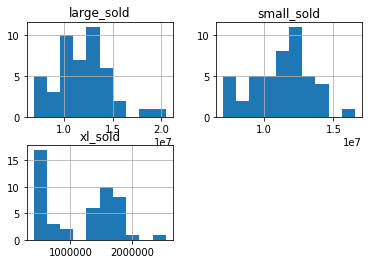

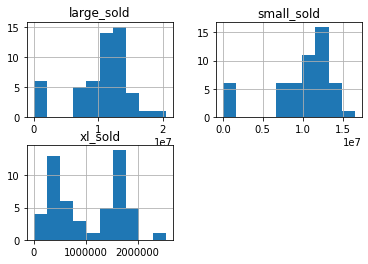

In [195]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

##### Exercise-38: List of dictionaries
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

| date | small_sold | large_sold |
| --- | --- | --- |
| "2019-11-03" | 10376832 |	7835071 |
| "2019-11-10" | 10717154 |	8561348 |

In [196]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


##### Exercise-39: Dictionary of lists
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

| date |	small_sold |	large_sold |
| --- | --- | --- |
| "2019-11-17" |	10859987 |	7674135 |
| "2019-12-01" |	9291631	| 6238096 |

In [197]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ['2019-11-17', '2019-12-01'],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


##### Exercise-40: CSV to DataFrame
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

```python
# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)
```

<code>           airline  year  nb_bumped  total_passengers
    0    DELTA AIR LINES  2017        679          99796155
    1     VIRGIN AMERICA  2017        165           6090029
    2    JETBLUE AIRWAYS  2017       1475          27255038
    3    UNITED AIRLINES  2017       2067          70030765
    4  HAWAIIAN AIRLINES  2017         92           8422734</code>   


<code>                   nb_bumped  total_passengers  bumps_per_10k
    airline                                                                                                                
    ALASKA AIRLINES           1392          36543121          0.381
    AMERICAN AIRLINES        11115         197365225          0.563
    DELTA AIR LINES           1591         197033215          0.081
    EXPRESSJET AIRLINES       3326          27858678          1.194
    FRONTIER AIRLINES         1228          22954995          0.535
    HAWAIIAN AIRLINES          122          16577572          0.074
    JETBLUE AIRWAYS           3615          53245866          0.679
    SKYWEST AIRLINES          3094          47091737          0.657
    SOUTHWEST AIRLINES       18585         228142036          0.815
    SPIRIT AIRLINES           2920          32304571          0.904
    UNITED AIRLINES           4941         134468897          0.367
    VIRGIN AMERICA             242          12017967          0.201</code>

##### Exercise-40: DataFrame to CSV
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

```python
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k', ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv('airline_totals_sorted.csv')
```

<code>                   nb_bumped  total_passengers  bumps_per_10k
    airline                                                        
    EXPRESSJET AIRLINES       3326          27858678          1.194
    SPIRIT AIRLINES           2920          32304571          0.904
    SOUTHWEST AIRLINES       18585         228142036          0.815
    JETBLUE AIRWAYS           3615          53245866          0.679
    SKYWEST AIRLINES          3094          47091737          0.657
    AMERICAN AIRLINES        11115         197365225          0.563
    FRONTIER AIRLINES         1228          22954995          0.535
    ALASKA AIRLINES           1392          36543121          0.381
    UNITED AIRLINES           4941         134468897          0.367
    VIRGIN AMERICA             242          12017967          0.201
    DELTA AIR LINES           1591         197033215          0.081
    HAWAIIAN AIRLINES          122          16577572          0.074</code>


THE END!